# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): EDA
### <center>Predict whether income exceeds $50K/yr based on census data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

# Leer CSV

In [2]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv

In [3]:
df = pd.read_csv("../data/adult.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


## Tipos de variables

In [5]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)


Numerical features:
 ['age' 'fnlwgt' 'education-num' 'capital-gain' 'capital-loss'
 'hours-per-week']

Categorical features:
 ['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'sex' 'native-country' 'salary']

Date/time features:
 []


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32074.0,10.079815,2.572999,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
df.describe(include=['object', 'bool']).T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32049,15,Prof-specialty,4073
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
salary,32561,2,<50k,24720


# <center> Univariate analysis

In [8]:
# Variables numericas
def plot_num(variable, title="", size=(16,4), zeros=True):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    plt.figure(figsize=size)
    sns.violinplot(variable, cut=0, palette="Set3", inner="quart" )
    sns.stripplot(variable, color="grey", alpha=.5).set_title(title, fontsize=20);
    
# Variables ordinales
def plot_ord(variable, title="", size=(16,4), zeros=True):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    plt.figure(figsize=size)
    sns.countplot(variable, color='royalblue').set_title(title, fontsize=20);
    
# Variables categoricas
def plot_cat(variable, title="", size=(16,4)):
    plt.figure(figsize=size)
    sns.countplot(y=variable, order=variable.value_counts().index).set_title(title, fontsize=20);

# Variables numéricas (números con decinales)

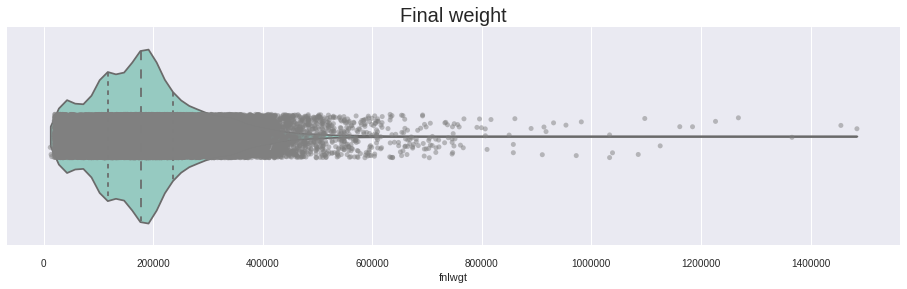

In [9]:
plot_num(df.fnlwgt, "Final weight")

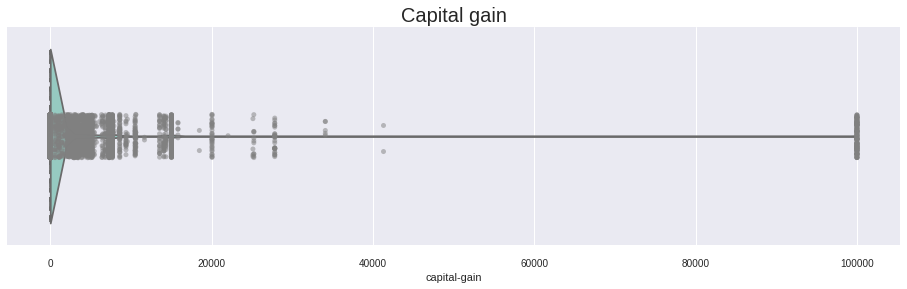

In [10]:
plot_num(df["capital-gain"], "Capital gain")

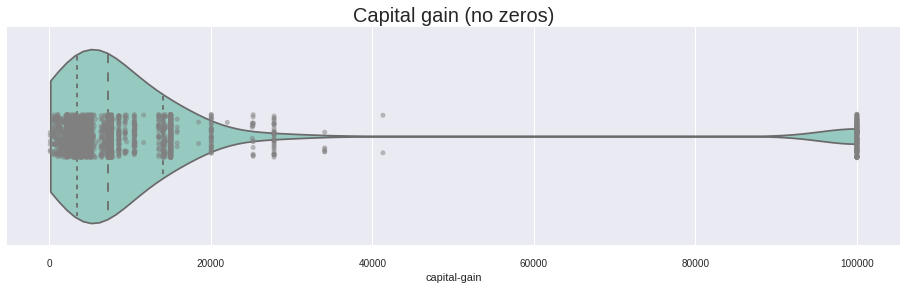

In [11]:
plot_num(df["capital-gain"], "Capital gain", zeros=False)

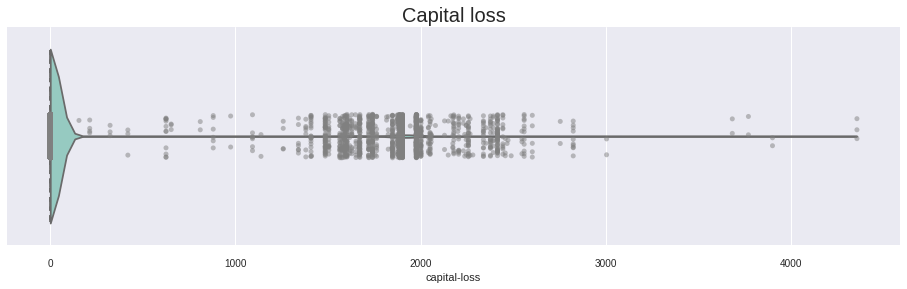

In [12]:
plot_num(df["capital-loss"], "Capital loss")

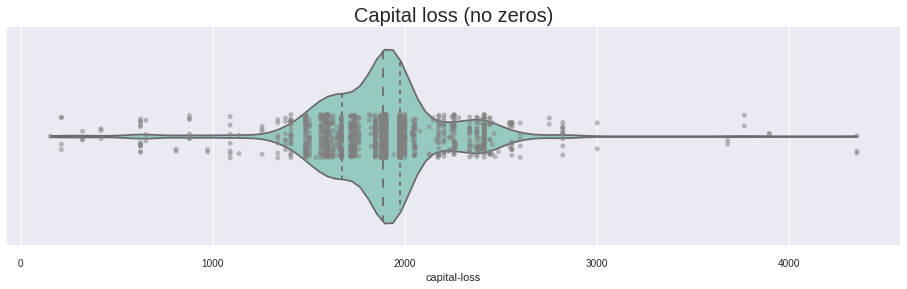

In [13]:
plot_num(df["capital-loss"], "Capital loss", zeros=False)

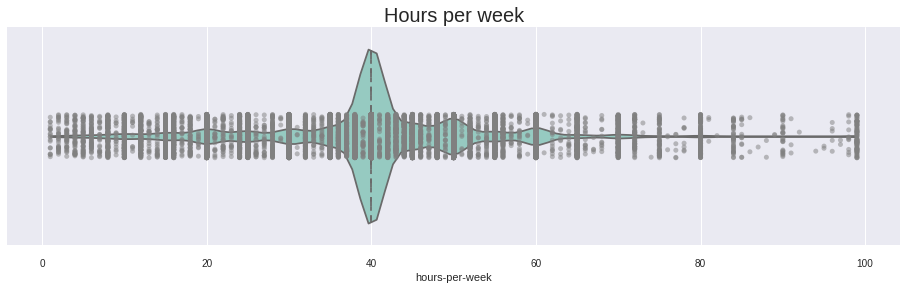

In [14]:
plot_num(df["hours-per-week"], "Hours per week")

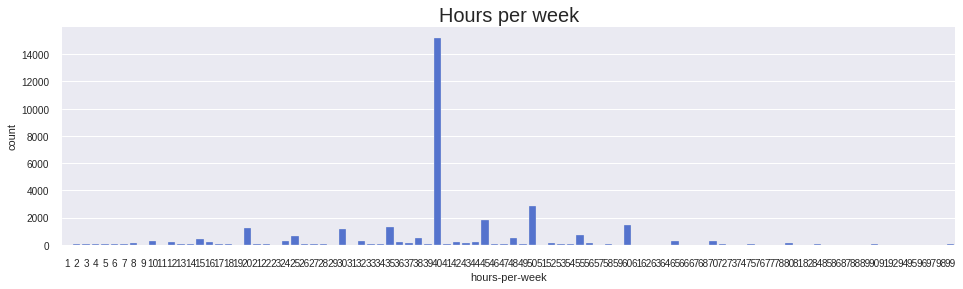

In [15]:
plot_ord(df["hours-per-week"], "Hours per week")

# Variables ordinales (números enteros)

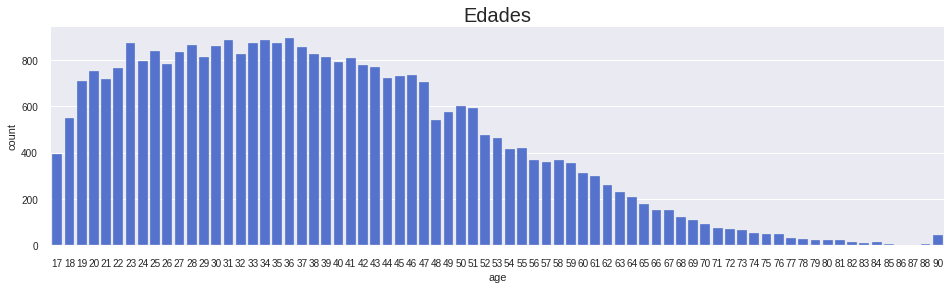

In [16]:
plot_ord(df.age, "Edades")

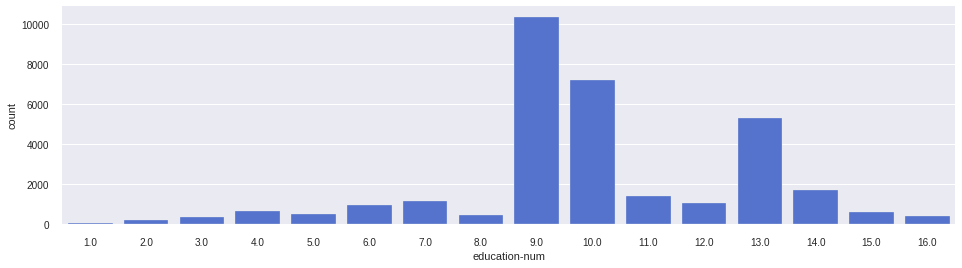

In [17]:
plot_ord(df["education-num"])

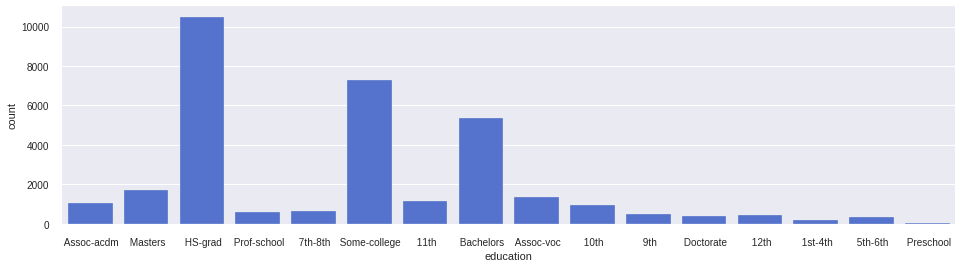

In [18]:
plot_ord(df["education"])

# Variables nominales (categorías)

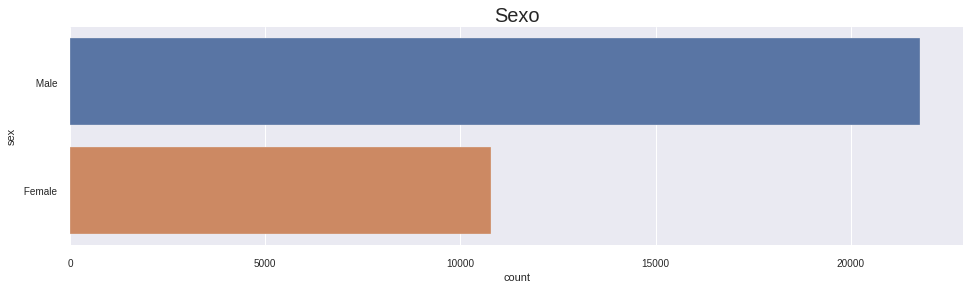

In [19]:
plot_cat(df["sex"], "Sexo")

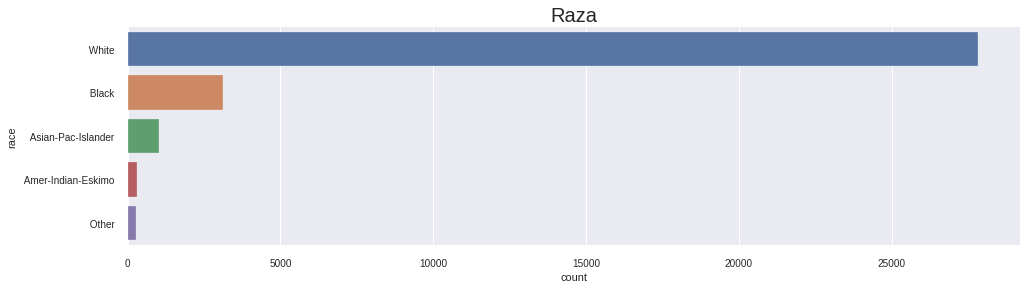

In [20]:
plot_cat(df["race"], "Raza")

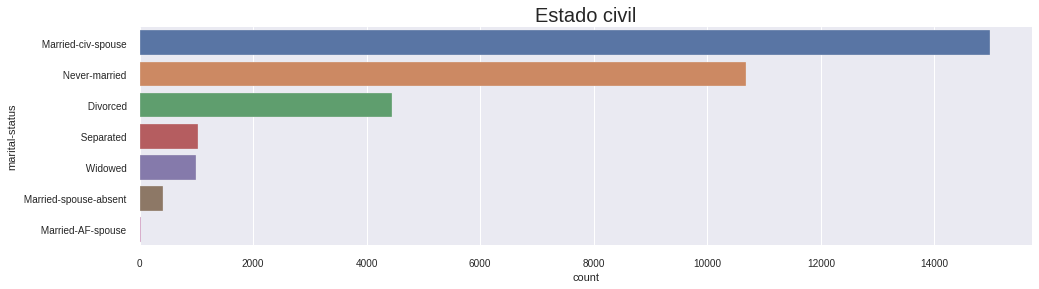

In [21]:
plot_cat(df["marital-status"], "Estado civil")

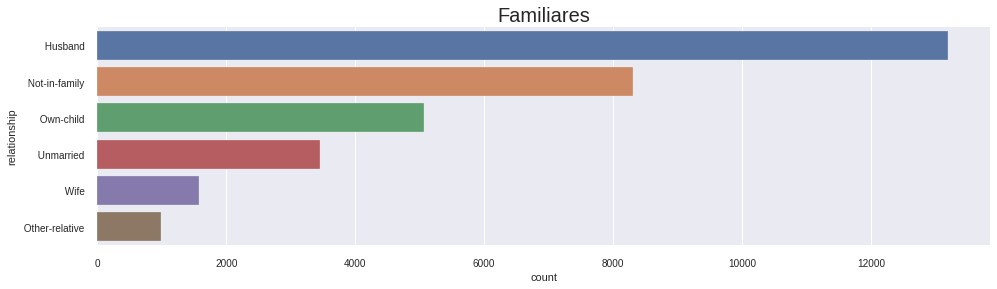

In [22]:
plot_cat(df["relationship"], "Familiares")

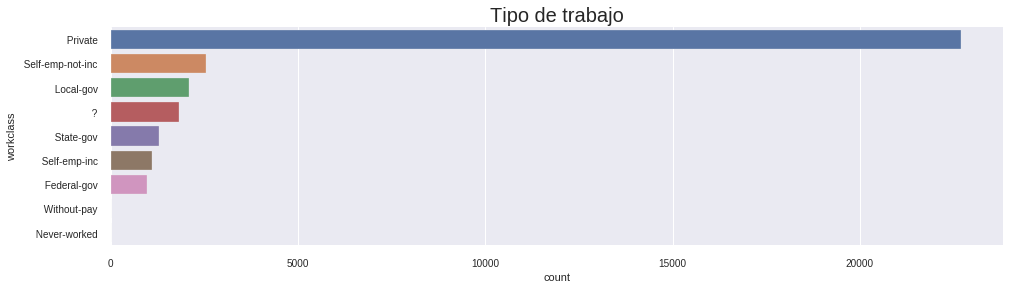

In [23]:
plot_cat(df["workclass"], "Tipo de trabajo")

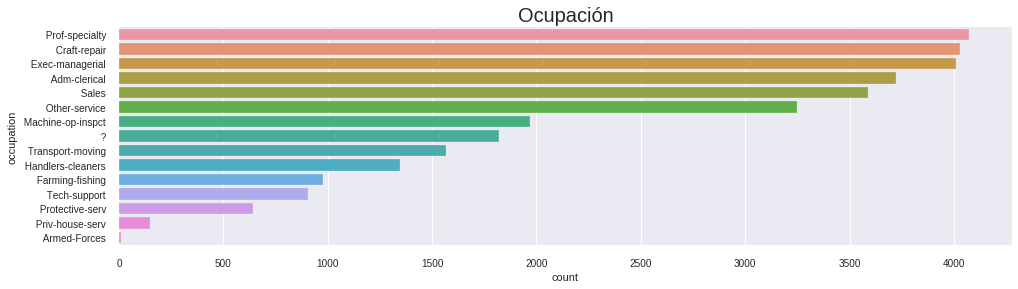

In [24]:
plot_cat(df["occupation"], "Ocupación")

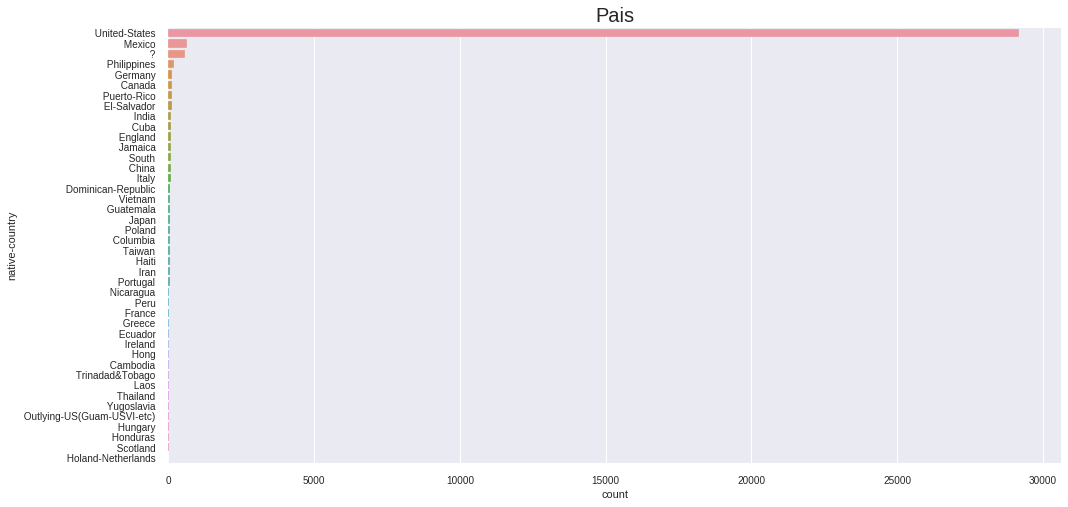

In [25]:
plot_cat(df["native-country"], "Pais", size=(16,8))

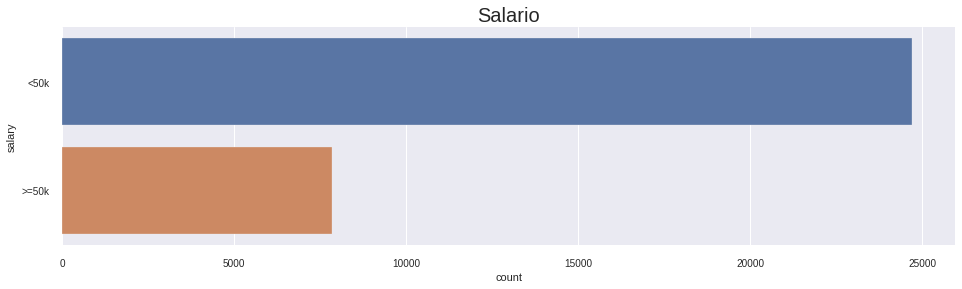

In [26]:
plot_cat(df["salary"], "Salario")

# Pairplot

/usr/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


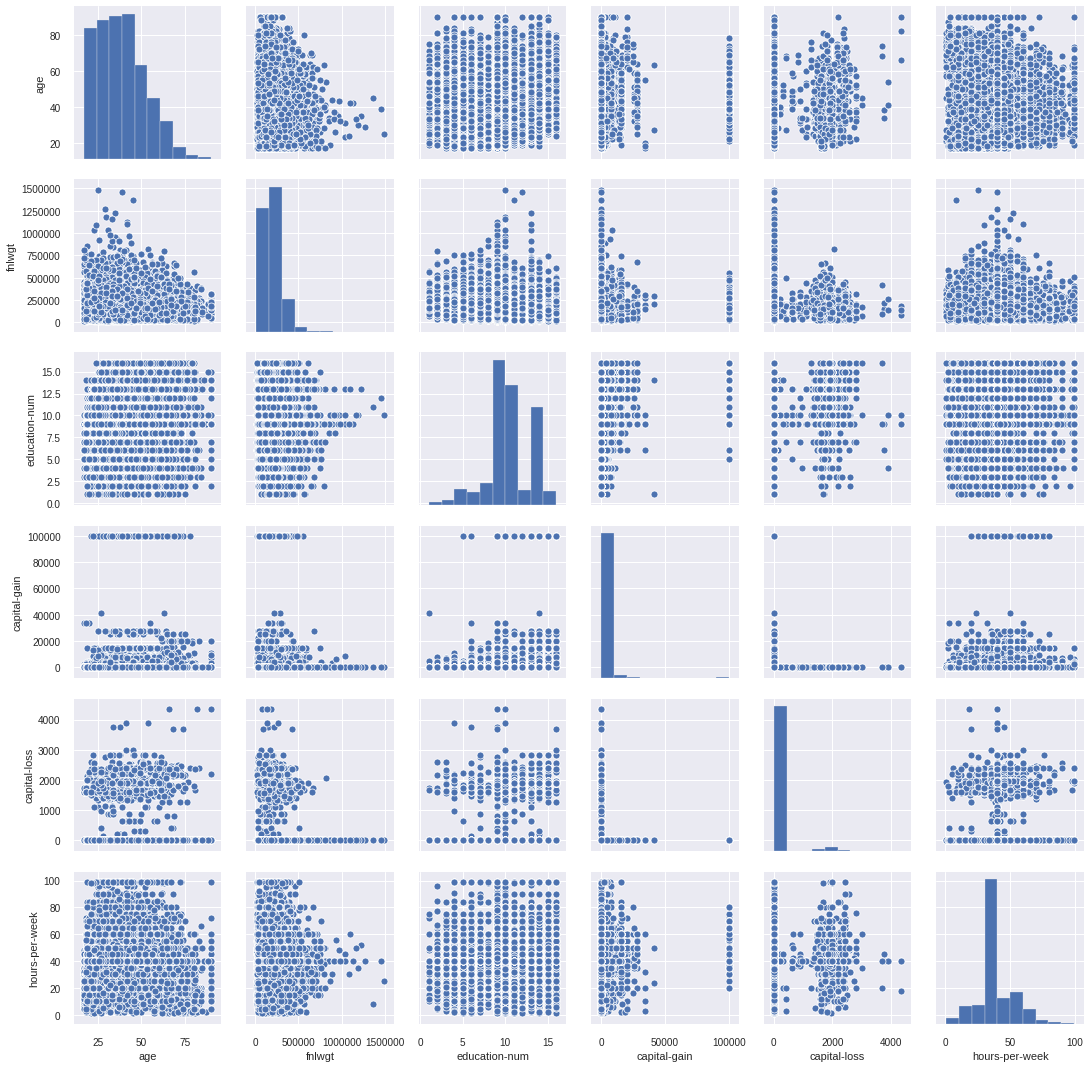

In [27]:
sns.pairplot(df);

# Pairplot en funcion de la variable a predecir

In [28]:
#sns.pairplot(df, hue="salary", dropna=True);

# Variable types

In [29]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("Numerical features:  ", len(num))
print("Categorical features:", len(cat))
print("Date/time features:  ", len(time))

Numerical features:   6
Categorical features: 9
Date/time features:   0


# Cardinallity (valores distintos)

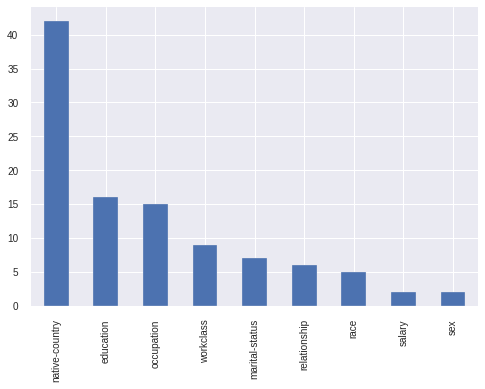

In [30]:
def plot_cardinality(df, cat):
    carinality = df[cat].nunique()
    carinality.sort_values(ascending=False, inplace=True)
    carinality.plot.bar()
    
plot_cardinality(df, cat)

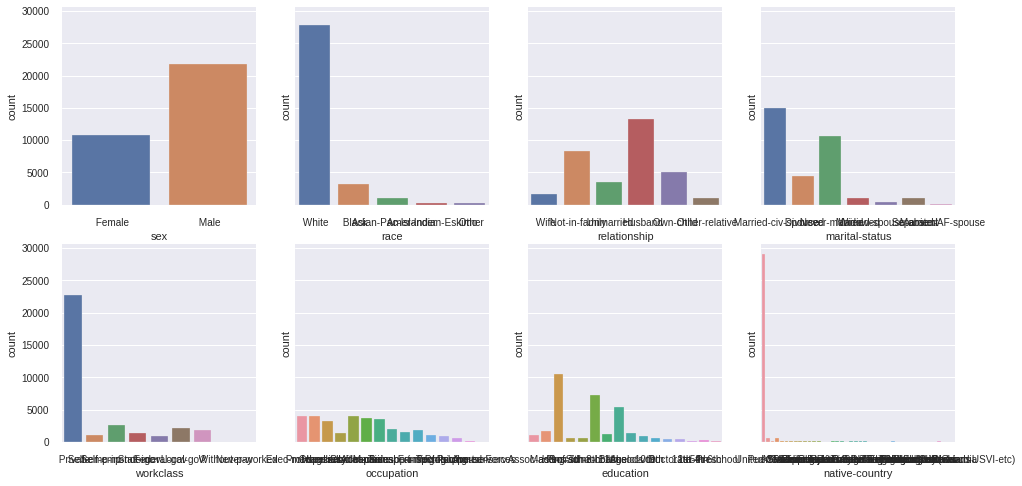

In [31]:
f, a = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)

sns.countplot(x='sex',            data=df, ax=a[0][0]);
sns.countplot(x='race',           data=df, ax=a[0][1]);
sns.countplot(x='relationship',   data=df, ax=a[0][2]);
sns.countplot(x='marital-status', data=df, ax=a[0][3]);
sns.countplot(x='workclass',      data=df, ax=a[1][0]);
sns.countplot(x='occupation',     data=df, ax=a[1][1]);
sns.countplot(x='education',      data=df, ax=a[1][2]);
sns.countplot(x='native-country', data=df, ax=a[1][3]);

# Qué queremos predecir? -> `df.Salary`

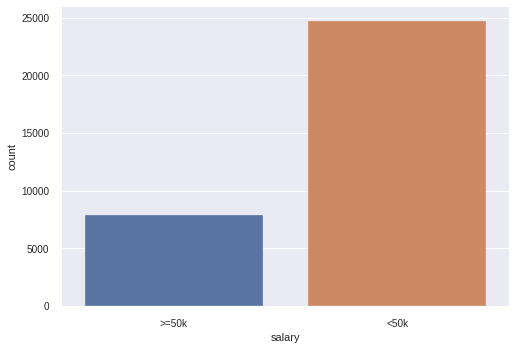

In [32]:
sns.countplot(df.salary);

# Missings

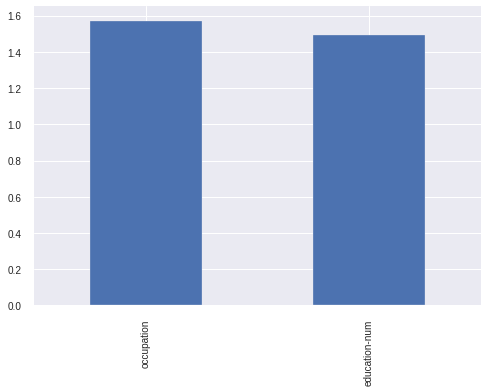

In [33]:
def plot_missings(df):
    missing = df.isnull().sum()
    missing = missing/df.isnull().count()*100
    missing = missing[missing > 0]
    missing.sort_values(ascending=False, inplace=True)
    missing.plot.bar()
    
plot_missings(df)

# Reducción de la dimensionalidad

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import altair as alt

In [35]:
df = df.dropna(axis='rows')

from sklearn.preprocessing   import LabelEncoder
df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,44,4,236746,12,14.0,0,4,1,4,1,10520,0,45,39,1
3,38,5,112847,14,15.0,2,10,0,1,1,0,0,40,39,1
5,20,4,63210,11,9.0,4,6,3,4,1,0,0,15,39,0
8,46,4,328216,11,9.0,2,3,0,4,1,0,0,40,39,1
21,26,4,746432,11,9.0,4,6,3,2,1,0,0,48,39,0


In [36]:
def plot_multidimensional(X, y):
    
    x_pca  = PCA(n_components=2).fit_transform(X)  # Compute PCA
    x_tsne = TSNE(random_state=0, n_jobs=-1).fit_transform(X) # Compute TSNE
    
    df = pd.DataFrame({'pca1': x_pca[:, 0],  'pca2': x_pca[:, 1],
                      'tsne1': x_tsne[:, 0], 'tsne2': x_tsne[:, 1],
                      "y": y})
    
    brush = alt.selection(type='interval', resolve='global')
    
    scatter = alt.Chart(df).mark_circle().encode(
        color=alt.condition(brush, 'y:N', alt.ColorValue('lightgray')),
    ).add_selection(
        brush
    ).properties(
        width=250,
        height=250
    )
    
    bars = alt.Chart(df).mark_bar().encode(
        x='y:N', 
        y='count(y):Q',
        color='y:N',
    ).transform_filter(
        brush
    ).properties(
        width=250,
        height=250
    )

    return scatter.encode(x='pca1', y='pca2') | scatter.encode(x='tsne1', y='tsne2') | bars


x = df.drop("salary", axis="columns")
y = df["salary"]

plot_multidimensional(x, y)

KeyboardInterrupt: 

In [18]:
#ProfileReport(df)